# Unsupervised Learning
## 비지도학습 간단 정리

---

## 2. 차원 축소 
### 여러 feature 중에서 어떤 특징이 제일 그 데이터를 가장 represent하는지 알게 해주는 extraction 역할을 함

<br>

### (1) PCA(주성분분석)
#### 기존의 feature를 선형 결합(linear combination)하는 알고리즘
#### 데이터 분포에서 분산이 가장 큰 방향벡터의 축을 찾아서 저차원으로 projection

In [1]:
from IPython.display import Image

![Dimensionality Reduction](./Dimensionality_Reduction_1.jpg)
#### 이미지 출처 : https://www.geeksforgeeks.org/dimensionality-reduction/

### * 유방암 데이터셋에 PCA를 적용할 것

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 차원 축소 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y=0(Malignant:악성 종양), y=1(Benign:양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

# 데이터를 훈련, 테스트 데이터셋으로 나누고, 각각 PCA에 적용할 예정

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### PCA 적용

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

#Train data에 PCA 알고리즘 적용
train_X_ = StandardScaler().fit_transform(train_X) # 불러온 데이터에 대한 정규화 -> 각 column의 range of value가 전부 다르기 때문에 정규화를 진행해 주어야 합니다.
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 주성분의 수를 2개, 즉 기저가 되는 방향벡터를 2개로 하는 PCA 알고리즘 수행
pc = pca.fit_transform(train_df)

In [4]:
#Test data에 PCA 알고리즘 적용
test_X_ = StandardScaler().fit_transform(test_X) # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

### SVM classifier(서포트 벡터 머신 분류기)를 훈련시켜 줌(양성, 악성을 구분해주는 경계선 역할)

In [5]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax): 
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
# 양성, 음성의 심플한 2분류이므로 SVM을 사용함
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


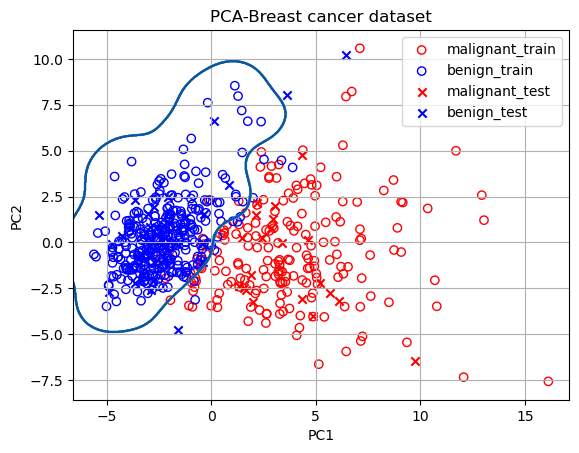

In [6]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])
#Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

### (2) T-SNE(T-Stochastic Neighbor Embedding) 
#### PCA는 데이터가 가진 고유한 물리적 정보량을 보존하는데 주력하지만, T-SNE는 고유한 물리적 정보량보다는 데이터들 간의 상대적 거리를 보존하는데 주력.
#### 주로 시각화를 위해 사용함(직관을 얻는 데 유용)

### * MNIST 데이터셋을 불러와서 적용할 것

In [7]:
from scipy.io import arff
import pandas as pd
import os

# 784 pixel로 이뤄진 mnist 이미지 데이터 호출
path = os.getenv('HOME')+'/Aiffel_Project/Dataset/mnist_784.arff'
mnist = arff.loadarff(path)

In [8]:
df = pd.DataFrame(mnist[0])
df['label'] = df['class'].apply(lambda i : str(i)[2])

n_image = mnist[0].shape[0]
pixel_columns = list(df.columns[:-2])

# Pandas DataFrame으로 볼 것

### 7만 개 데이터 중 1만 개를 랜덤 샘플링
#### 또한 matplot을 이용해 데이터를 살펴볼 것임

In [9]:
import numpy as np

# 결과가 재생산 가능하도록 랜덤 시드를 지정합니다.
np.random.seed(32)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담습니다.
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담습니다.
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[random_idx,:].copy()
df_subset.shape

(10000, 786)

<Figure size 640x480 with 0 Axes>

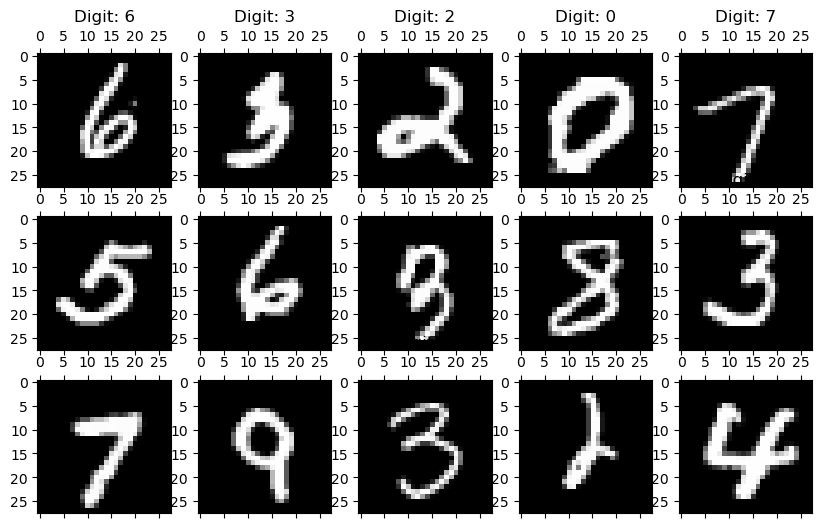

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure( figsize=(10,6) )
n_img_sample = 15
width,height = 28,28

# 15개 샘플을 시각화해 봅니다. 
for i in range(0,n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width,height))
               .astype(float))

plt.show()

### (1) PCA를 이용해 차원 축소

In [11]:
from sklearn.decomposition import PCA

print("df_subset의 shape: {}".format(df_subset.shape))

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두 번째 차원 값

print("pca_result의 shape: {}".format(pca_result.shape))

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)


In [12]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

pca-1: 9.8%
pca-2: 7.1%


#### * 784 차원을 PCA를 통해 2차원으로 차원 축소를 할 경우, 정보량이 전체의 16.9%(9.8%+7.1%)가 남는 것을 알 수 있음.

### 2차원으로 줄인 결과 벡터를 산점도로 시각화

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

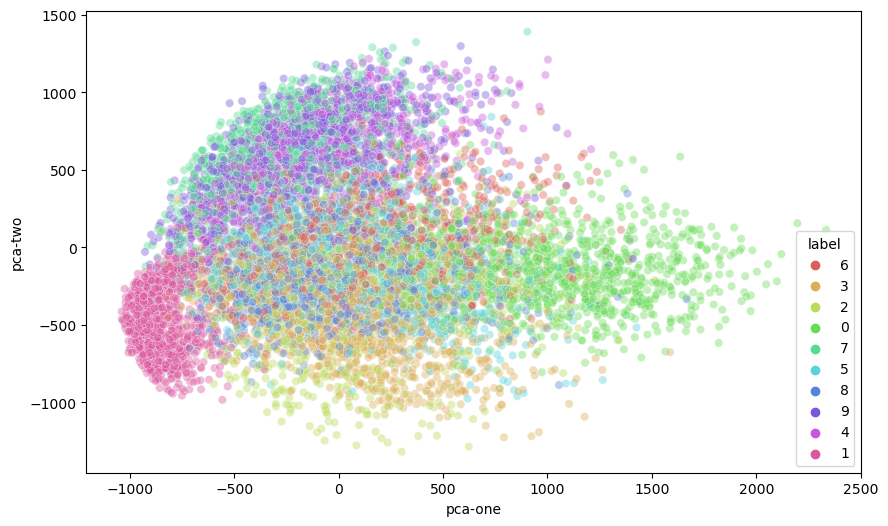

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
    legend="full",
    alpha=0.4
)

#### * 이처럼 같거나 모양이 비슷한 숫자 데이터가 유사한 벡터값을 갖는 것을 색상으로 확인 가능

### (2) T-SNE를 이용한 차원 축소

In [14]:
from sklearn.manifold import TSNE

print("df_subset의 shape: {}".format(df_subset.shape))

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension, verbose=1) #(몇 차원으로 축소를 할 것인지, 과정을 보는)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_results의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.013s...


/Users/jsj/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jsj/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 0.812s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 520.487486
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.581131
[t-SNE] KL divergence after 1000 iterations: 1.821003
tsne_results의 shape: (10000, 2)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

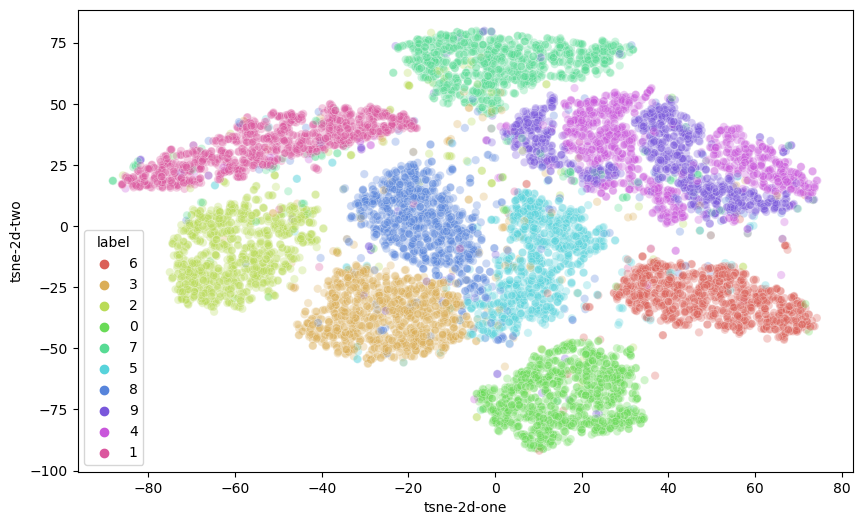

In [15]:
# tsne 결과를 차원별로 추가합니다.
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

#### * 오로지 시각화에만 유리, 값을 바꾸면 다른 결과가 나오는 것을 확인 가능
### T-SNE는 정보 손실량에 주목하지 않으며, 아무런 물리적 의미를 갖지 않는다.